   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   

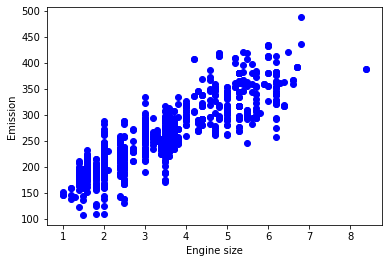

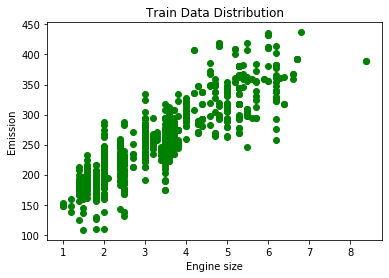

######  Multiple Regression Model using 3 Variables: ######
Coefficients:  [[10.91606589  7.74482357  9.33527425]]
intercept: [66.13254848]
Residual sum of squares: 535.07
Variance score: 0.87


 ######  Multiple Regression Model using 4 Variables: ######
Cofficient: [[11.10760223  7.04585366  6.93340647  1.80770569]]
intercept: [68.34791141]
residula sum of squares: 547.26
Variance score: 0.87


In [12]:
################################################################################################################################
################################################ Multiple Linear Regression ####################################################
################################################################################################################################

# About this Notebook:
# In this notebook, we will use scikit-learn to implement Multiple linear regression. We download a dataset that is 
# related to fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, 
# create a model using training set, Evaluate your model using test set, and finally use model to predict unknown value.

# Importing Needed packages:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
%matplotlib inline

# Downloading Data:
url='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv'

# Understanding the Data:
# We have downloaded a fuel consumption dataset, FuelConsumption.csv, which contains model-specific fuel consumption ratings 
# and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.
# MODELYEAR e.g. 2014
# MAKE e.g. Acura
# MODEL e.g. ILX
# VEHICLE CLASS e.g. SUV
# ENGINE SIZE e.g. 4.7
# CYLINDERS e.g 6
# TRANSMISSION e.g. A6
# FUELTYPE e.g. z
# FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
# FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
# FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
# CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

# Reading the data:
df = pd.read_csv(url)

# take a look at the dataset
print(df.head())

# Lets select some features that we want to use for regression:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
print("\n\n -->Features that we want to use for regression: \n\n",cdf.head())

# Lets plot Emission values with respect to Engine size:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

# Creating train and test dataset:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

# Train data distribution:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='green')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.title("Train Data Distribution")
plt.show()

##################################################################
# Multiple Regression Model using 3 Variables:
# In reality, there are multiple variables that predict the Co2emission.For example, predicting co2emission using 
# FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. The good thing here is that Multiple linear regression 
# is the extension of simple linear regression model.
print("######  Multiple Regression Model using 3 Variables: ######")
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print('intercept:', regr.intercept_)
# Prediction:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x_test = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

##################################################################
# Multiple Regression Model using 4 Variables:
print("\n\n ######  Multiple Regression Model using 4 Variables: ######")
regrP = linear_model.LinearRegression()
xP = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
yP = np.asanyarray(train[['CO2EMISSIONS']])
regrP.fit(xP, yP)
print('Cofficient:', regrP.coef_)
print('intercept:', regrP.intercept_)

y_hatPT=regrP.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
xPT = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
yPT = np.asanyarray(test[['CO2EMISSIONS']])
print("residula sum of squares: %.2f" % np.mean((y_hatPT - yPT)**2))
print('Variance score: %.2f' % regrP.score(xPT, yPT))
